This is a take home test from Money Lion. Primary Objective is to create a model on the risk of a borrower to default. While there are tools and services that does provide an analysis on whether the borrower would like to default (or a fraud), it is not foolproof thus further analysis should be done after the loan is given (or originated) as this provides more insights on the borrower's risk of default. This is due to new variable present (for example, in the payment file where there is payment status). 

From the data, we can observe the loan approval process to go similar to this: 

Loan application-->automated/manual risk assessment-->loan approval-->funded

By identifying more variables from the data that we have, we could fortify the risk assessment process thus reducing the chance of approving someone that would very likely to default or at least know their risk. Therefore, we first would look at the status of the loan (loanStatus) of loans that are funded as our starting point

In [1]:
import preprocess
import visual
import statistics_summary
import statistical_tests
import pandas as pd
import data_processing
import model_train

c:\Users\haffi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
#read CSV
loan=preprocess.read_csv('data/loan.csv')
#considering funded loans, assuming human and auto underwriters do their job well
loan=preprocess.only_funded(loan)

In [3]:
#normalizing the value counts of loanstatus to see distribution and all the values
print(loan['loanStatus'].value_counts(normalize=True))

Paid Off Loan                  0.293135
External Collection            0.290750
New Loan                       0.208096
Internal Collection            0.142733
Returned Item                  0.030322
Settlement Paid Off            0.018162
Settled Bankruptcy             0.008337
Pending Paid Off               0.004335
Charged Off Paid Off           0.004079
Charged Off                    0.000026
Settlement Pending Paid Off    0.000026
Name: loanStatus, dtype: float64


In [4]:
#considering loan status as the dependent
loan=preprocess.default(loan) #create new variable default, see at preprocess
loan=preprocess.time_to_approve(loan) #create new variable called time_to_approve, see at preprocess
#payment=preprocess.read_csv('data/payment.csv')
preprocess.blank_checker(loan)
preprocess.blank_filler(loan)
loan=preprocess.read_csv('data/cleaned_loaned_data.csv')

Column 'nPaidOff' has blank values.
Column 'fpStatus' has blank values.
Column 'clarityFraudId' has blank values.


we can see 3 columns has blank values however fpstatus have intentional blanks so we can say two.can't say much about clarity id since it's just ID so we look to npaidoff, and fill in the blanks with 0


In [25]:
#visual.bar_for_leadtype(loan)
#by mandatory has the most, and by distribution also similar for 1 and 0 for default, not much to go on
#checking how much they owe maybe? try checking the relations of all variables except for IDs



# Get the summary statistics for each group
sstats = statistics_summary.summary_statistics(loan)
sstats.to_csv("data/statistics_summary.csv", index=True)

Mean loan amount of defaulters is lower so this suggests that lower loans tend to default,APR may not be a strong indicator as there's not much difference in mean.Data also suggest that Illinois have a higher default rates than other states. Longer approval time mean for defaulter is higher which would suggest longer approval time would likely result in a default, which is understandable as more inquiries may be done.                           

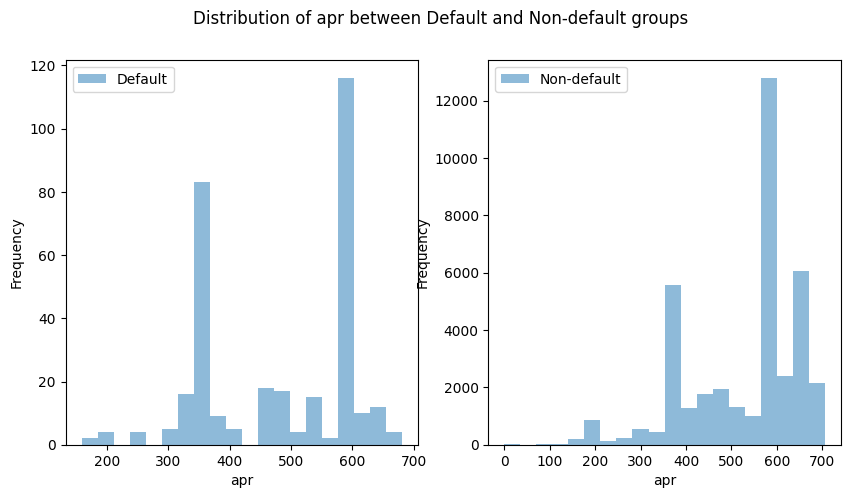

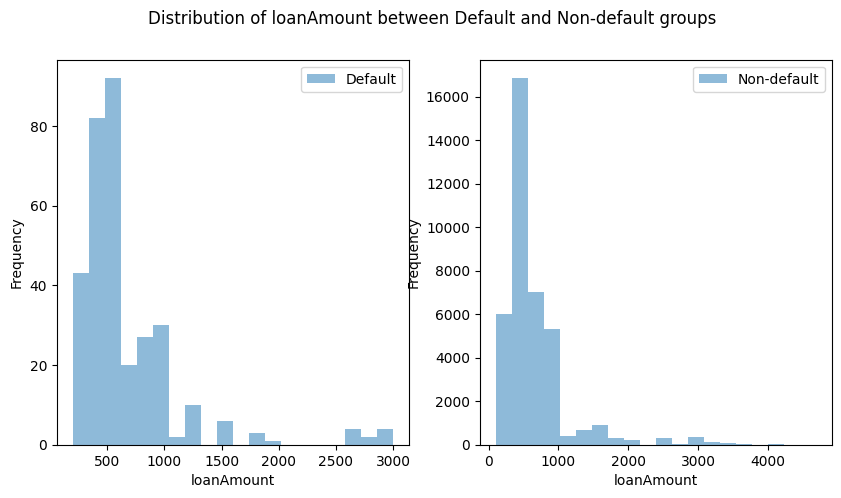

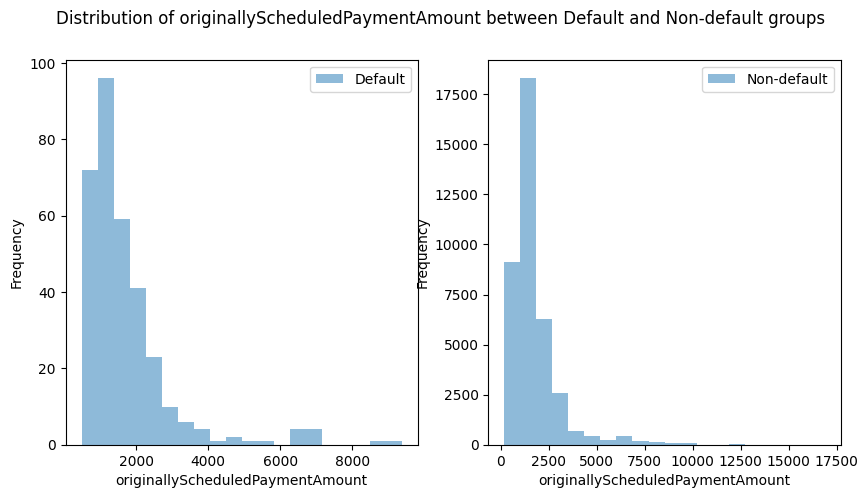

Mann-Whitney U test for loan amount:
Statistic=6643485.00, p-value=0.0883
Mann-Whitney U test for loan amount:
Statistic=6042065.00, p-value=0.2008


,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,default,timeToApprove
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,0,17.0
1,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28 19:54:22.982,True,2016-11-29 20:30:40.640,2.0,True,1,...,350.0,893.88,MO,organic,0,Checked,NaN,0,0,24.0
2,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01 15:55:41.823,True,2017-03-01 16:15:13.016,0.0,True,1,...,400.0,1364.87,NJ,lead,40,Checked,58b6eef8e4b0b6fca82fd426,1,0,0.0
3,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,True,2017-01-31 18:00:14.520,2.0,True,1,...,1250.0,3313.78,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,0,0.0
4,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,True,2016-08-29 15:05:04.014,0.0,True,1,...,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1,0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38977,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01 16:57:49.231,True,2016-12-01 17:28:21.872,3.0,True,1,...,600.0,1670.18,CA,rc_returning,0,Checked,NaN,0,0,0.0
38978,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14 19:43:08.685,True,2017-01-14 20:00:10.426,0.0,True,1,...,375.0,1042.40,AL,lead,25,Checked,587a7f49e4b08f2485d48358,1,0,0.0
38979,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22 01:10:50.110,True,2016-06-22 21:46:54.359,0.0,True,1,...,400.0,664.12,WI,lead,40,Checked,5769e592e4b0ab6c50364d45,1,0,20.0
38980,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30 15:49:39.785,True,2016-12-30 16:00:12.500,0.0,True,1,...,600.0,1868.88,IN,lead,25,Checked,58668211e4b08f246e282356,1,0,0.0


In [6]:
#plotting
visual.plot_histograms(loan, 'apr')
visual.plot_histograms(loan, 'loanAmount')
visual.plot_histograms(loan, 'originallyScheduledPaymentAmount')
#not symmetrical skewed.defaulters tend to take lower loans and lower payment amount.
#checking whether the default has clarityFraudID
#testing for statistical significance using mann-whitney
statistical_tests.manwhit(loan,'loanAmount')
statistical_tests.manwhit(loan,'originallyScheduledPaymentAmount')
#not much significant difference between the two as p>0.05, no difference between the distribution of two groups.

In [7]:
#preprocess.clarity_id_checker(loan)
#loan_with_only_clarity_id=preprocess.read_csv('data/with_CF_ID.csv')
underwriting=preprocess.read_csv('data/clarity_underwriting_variables.csv')
underwriting = underwriting[['underwritingid', 'clearfraudscore']]
#merging the two
merged_data_loan_underwriting = loan.merge(underwriting, left_on='clarityFraudId', right_on='underwritingid', how='inner')
merged_data_loan_underwriting.to_csv("data/merged_data_loan_underwriting.csv",index=False)
merged_data=preprocess.read_csv("data/merged_data_loan_underwriting.csv")

c:\Users\haffi\Desktop\development\risk\preprocess.py:4: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='latin-1')


In [26]:
#summary of merge
stats_merged_data=statistics_summary.summary_statistics(merged_data)
stats_merged_data.to_csv("data/statistics_summary_CF.csv",index=True)

defaulters have lower number of inquiries across

defaulters have lower mean and stdev values of unique fraud indicator, meaning higher likelihood of default

generally higher clear fraud score for defaulters than non defaulters
mean 692 and stdev 142 for defaulters and 685 mean and 127 stdev

defaulters have lower apr mean than non defaulters. need more data to infer as lower apr means higher credit score

defaulters paid off more loans in the past than non defaulter

defaulters have a higher mean amount of loan than non defaulters

defaulters have a higher lead cost mean than non defaulters. it could suggest that the company is spending more money on acquiring customers who are more likely to default. This could be an indication of a problem with the company's lead generation process or with its credit risk assessment and underwriting practices. It could also suggest that the company is not targeting the right customer segments, or that it needs to adjust its pricing or credit policies to better align with the credit risk of different customer segments.

defaulters have a longer approval time mean than non defaulter.This may suggest that there is an issue with the underwriting process or that there are other factors contributing to the delay in loan approval that also make it more likely for borrowers to default.

defaulters have a higher number of mean unique ssns number than non defaulter,This could indicate that people who have multiple bank accounts may be more likely to default on a loan.


In [9]:
#merging clean_loan_data and payment
payment=preprocess.read_csv("data/payment.csv")
cleaned_loaned_data=preprocess.read_csv("data/cleaned_loaned_data.csv")
merged_data_loan_payment=cleaned_loaned_data.merge(payment,on="loanId")
merged_data_loan_payment.to_csv("data/merged_data_loan_payment.csv",index=False)

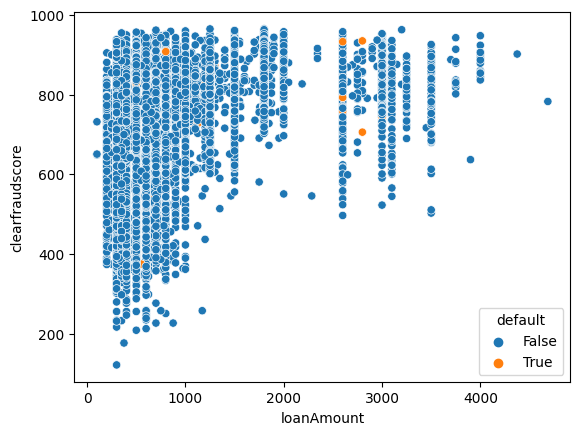

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,default,timeToApprove,underwritingid,clearfraudscore
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,0,17.0,569eb3a3e4b096699f685d64,879.0
1,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01 15:55:41.823,True,2017-03-01 16:15:13.016,0.0,True,1,...,NJ,lead,40,Checked,58b6eef8e4b0b6fca82fd426,1,0,0.0,58b6eef8e4b0b6fca82fd426,658.0
2,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,True,2017-01-31 18:00:14.520,2.0,True,1,...,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,0,0.0,58450a15e4b0bb9d6d7344c7,835.0
3,LL-I-17491287,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-02-21 17:20:23.671,True,2017-02-21 17:45:11.088,3.0,True,1,...,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,0,0.0,58450a15e4b0bb9d6d7344c7,835.0
4,LL-I-15679301,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-18 01:16:24.941,True,2017-01-18 01:30:16.712,1.0,True,1,...,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,0,0.0,58450a15e4b0bb9d6d7344c7,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32175,LL-I-17508871,f0b666fdd1b46c58297b3828b61047ad,M,180.2,2017-02-21 20:29:57.538,True,2017-02-21 20:45:06.563,0.0,True,1,...,CO,lead,25,Rejected,58aca342e4b0bf804c0e82db,1,0,0.0,58aca342e4b0bf804c0e82db,695.0
32176,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14 19:43:08.685,True,2017-01-14 20:00:10.426,0.0,True,1,...,AL,lead,25,Checked,587a7f49e4b08f2485d48358,1,0,0.0,587a7f49e4b08f2485d48358,700.0
32177,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22 01:10:50.110,True,2016-06-22 21:46:54.359,0.0,True,1,...,WI,lead,40,Checked,5769e592e4b0ab6c50364d45,1,0,20.0,5769e592e4b0ab6c50364d45,806.0
32178,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30 15:49:39.785,True,2016-12-30 16:00:12.500,0.0,True,1,...,IN,lead,25,Checked,58668211e4b08f246e282356,1,0,0.0,58668211e4b08f246e282356,769.0


In [10]:
visual.scatter_plot(merged_data_loan_underwriting,'loanAmount','clearfraudscore' )

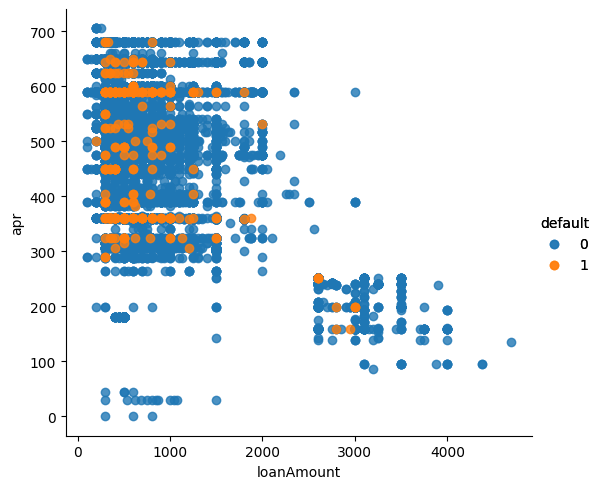

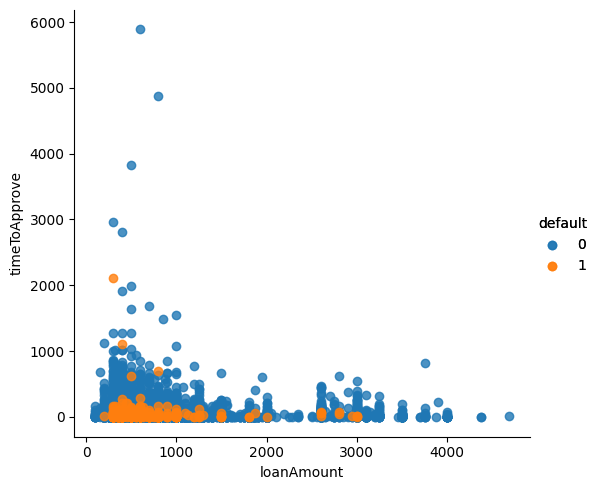

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,default,timeToApprove
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,0,17.0
1,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28 19:54:22.982,True,2016-11-29 20:30:40.640,2.0,True,1,...,350.0,893.88,MO,organic,0,Checked,NaN,0,0,24.0
2,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01 15:55:41.823,True,2017-03-01 16:15:13.016,0.0,True,1,...,400.0,1364.87,NJ,lead,40,Checked,58b6eef8e4b0b6fca82fd426,1,0,0.0
3,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,True,2017-01-31 18:00:14.520,2.0,True,1,...,1250.0,3313.78,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,0,0.0
4,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,True,2016-08-29 15:05:04.014,0.0,True,1,...,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1,0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38977,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01 16:57:49.231,True,2016-12-01 17:28:21.872,3.0,True,1,...,600.0,1670.18,CA,rc_returning,0,Checked,NaN,0,0,0.0
38978,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14 19:43:08.685,True,2017-01-14 20:00:10.426,0.0,True,1,...,375.0,1042.40,AL,lead,25,Checked,587a7f49e4b08f2485d48358,1,0,0.0
38979,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22 01:10:50.110,True,2016-06-22 21:46:54.359,0.0,True,1,...,400.0,664.12,WI,lead,40,Checked,5769e592e4b0ab6c50364d45,1,0,20.0
38980,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30 15:49:39.785,True,2016-12-30 16:00:12.500,0.0,True,1,...,600.0,1868.88,IN,lead,25,Checked,58668211e4b08f246e282356,1,0,0.0


In [11]:

visual.heat_map(loan,'loanAmount','apr')
#loan amount less than 1000 and higher apr tend to default more
visual.heat_map(loan,'loanAmount','timeToApprove')
#shorter approval time for low loan amount ~<500 hour, defaulters tend to be in this range, although from earlier statistics, we know that longer approval time leads to more likely to default

In [12]:
#transforming the values in cleaned_loan_data to numerics
encoded_data_loan_underwriting=data_processing.encode_to_numerical(merged_data)

encoded_data_loan_underwriting = encoded_data_loan_underwriting.drop(['clarityFraudId','underwritingid','originated','approved','isFunded','loanStatus','applicationDate','originatedDate','anon_ssn'],axis=1)
encoded_data_loan_underwriting.to_csv('data/encoded_cleaned_loan_data.csv',index=False)

payFrequency encoding: {'B': 0, 'I': 1, 'M': 2, 'S': 3, 'W': 4}
leadType encoding: {'bvMandatory': 0, 'california': 1, 'express': 2, 'instant-offer': 3, 'lead': 4, 'lionpay': 5, 'organic': 6, 'prescreen': 7, 'rc_returning': 8, 'repeat': 9}
fpStatus encoding: {'Cancelled': 0, 'Checked': 1, 'Pending': 2, 'Rejected': 3, 'Skipped': 4, nan: 5}
state encoding: {'AK': 0, 'AL': 1, 'AZ': 2, 'CA': 3, 'CO': 4, 'CT': 5, 'DE': 6, 'FL': 7, 'GA': 8, 'HI': 9, 'IA': 10, 'ID': 11, 'IL': 12, 'IN': 13, 'KS': 14, 'KY': 15, 'LA': 16, 'MI': 17, 'MN': 18, 'MO': 19, 'MS': 20, 'NC': 21, 'ND': 22, 'NE': 23, 'NJ': 24, 'NM': 25, 'NV': 26, 'OH': 27, 'OK': 28, 'PA': 29, 'RI': 30, 'SC': 31, 'SD': 32, 'TN': 33, 'TX': 34, 'UT': 35, 'VA': 36, 'WA': 37, 'WI': 38, 'WY': 39}


In [13]:
#merging encoded_data_loan_underwriting with payment 
main_data=encoded_data_loan_underwriting
# Group the data by loanId and paymentStatus and count the occurrences
status_counts = payment.groupby(['loanId', 'paymentStatus']).size().reset_index(name='count')

# Pivot the table so that paymentStatus becomes columns and count becomes values
status_counts = status_counts.pivot(index='loanId', columns='paymentStatus', values='count').fillna(0)

# Rename the columns to include "PaymentStatus_"
status_counts.columns = ['paymentStatus_' + col for col in status_counts.columns]

# Merge the aggregated data back to the main_data dataframe
main_data = main_data.merge(status_counts, on='loanId', how='left')



main_data.to_csv("data/main_data_file.csv",index=False)




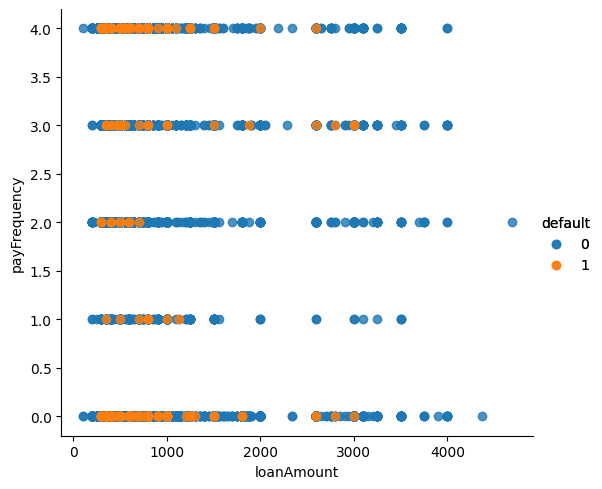

,loanId,payFrequency,apr,nPaidOff,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,...,clearfraudscore,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_Complete,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentStatus_Rejected Awaiting Retry,paymentStatus_Returned,paymentStatus_Skipped
0,LL-I-06644937,0,199.0,0.0,3000.0,6395.19,3,7,0,1,...,879.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LL-I-17826953,4,645.0,0.0,400.0,1364.87,24,4,40,1,...,658.0,0.0,0.0,0.0,24.0,2.0,0.0,0.0,0.0,0.0
2,LL-I-16519347,3,490.0,2.0,1250.0,3313.78,19,6,0,1,...,835.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LL-I-17491287,3,490.0,3.0,1250.0,3112.16,19,6,0,1,...,835.0,0.0,1.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0
4,LL-I-15679301,3,490.0,1.0,500.0,1292.09,19,6,0,1,...,835.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32175,LL-I-17508871,2,180.2,0.0,500.0,794.60,4,4,25,3,...,695.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
32176,LL-I-15280684,2,645.0,0.0,375.0,1042.40,1,4,25,1,...,700.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32177,LL-I-09897110,0,449.0,0.0,400.0,664.12,38,4,40,1,...,806.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32178,LL-I-14178923,0,625.0,0.0,600.0,1868.88,13,4,25,1,...,769.0,0.0,5.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [14]:
visual.heat_map_pay_frequency_APR(main_data,'loanAmount','payFrequency')


Looks like  W & B has a higher occurence of defaulting for loan amount less than 1000.outlier present ~2500

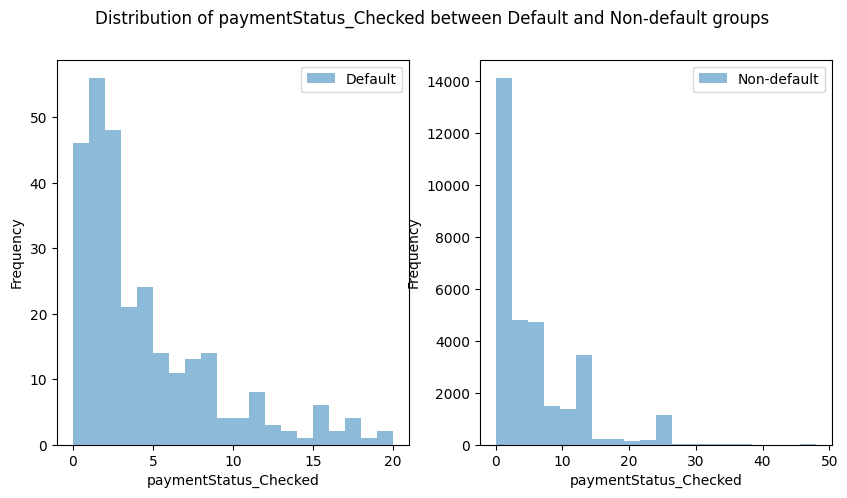

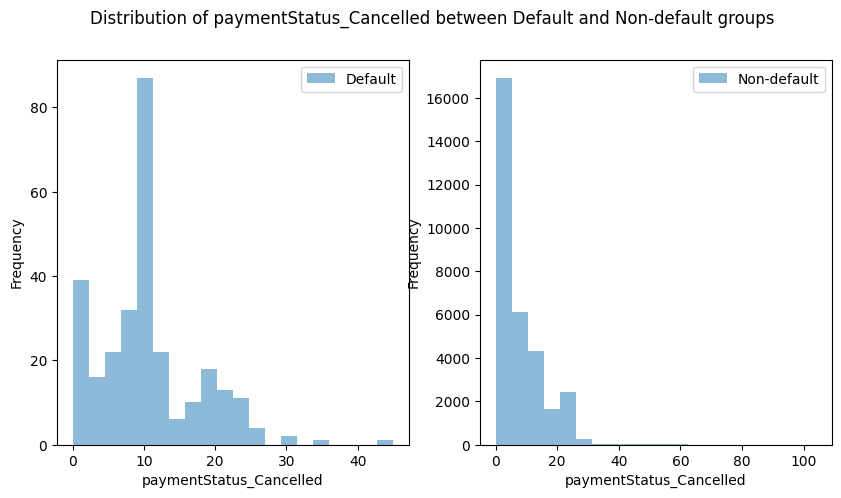

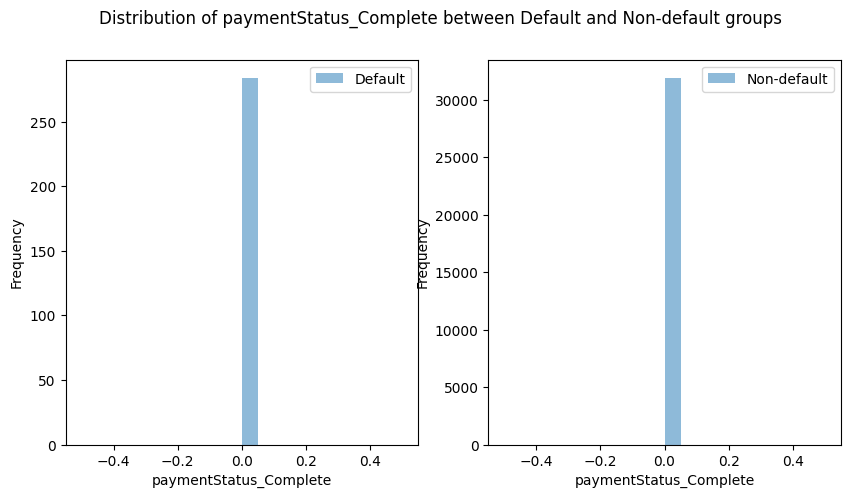

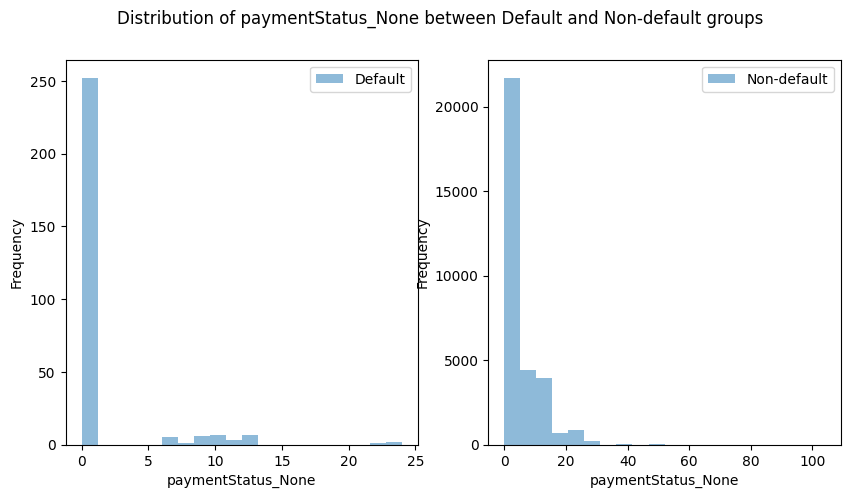

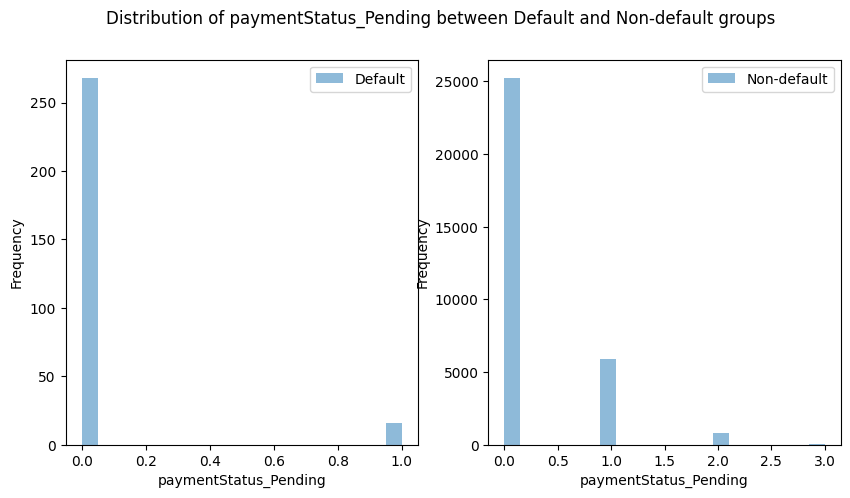

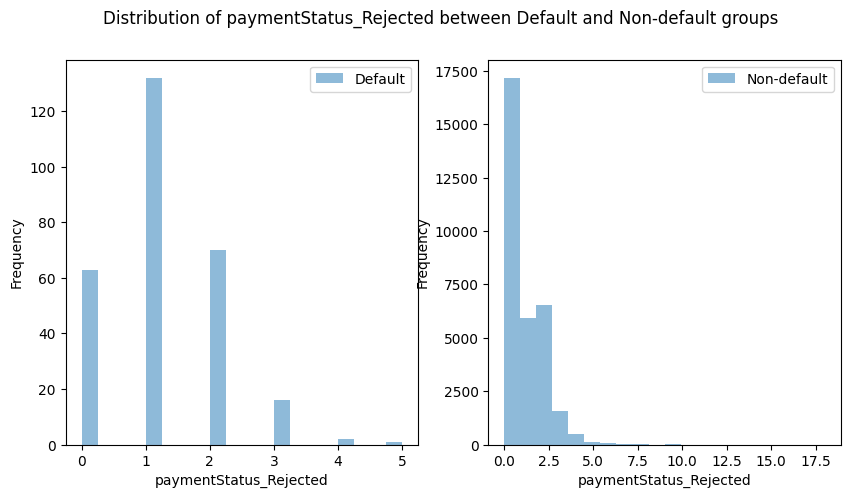

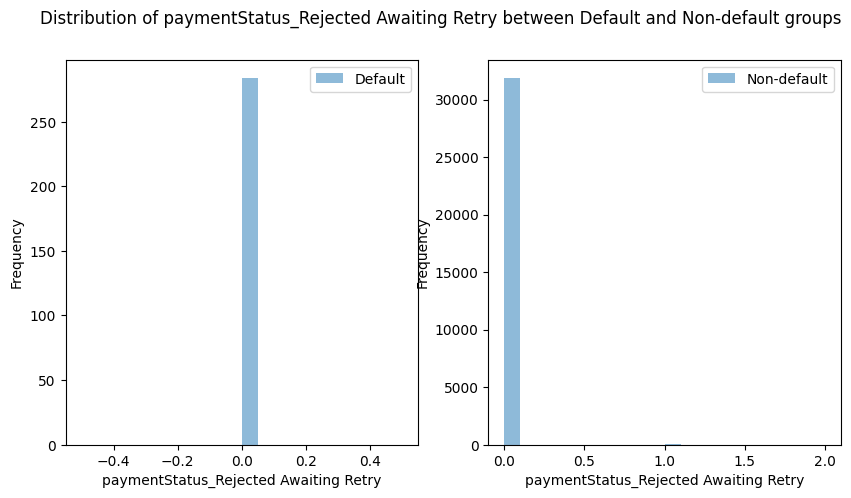

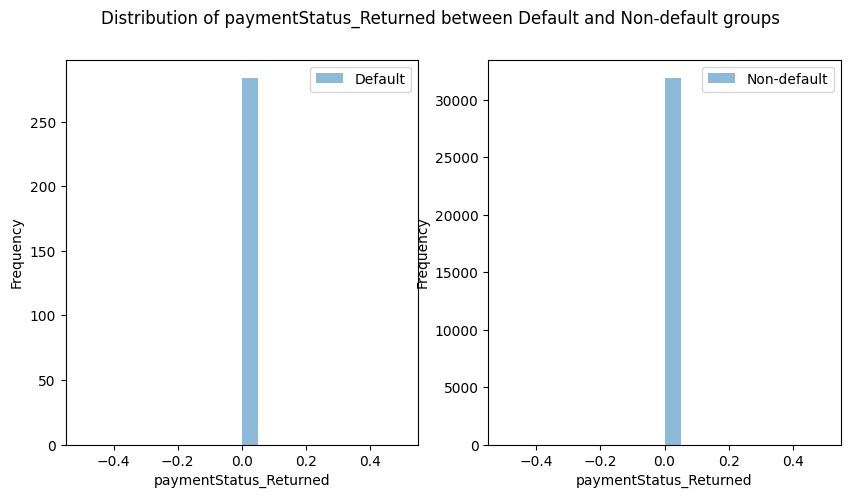

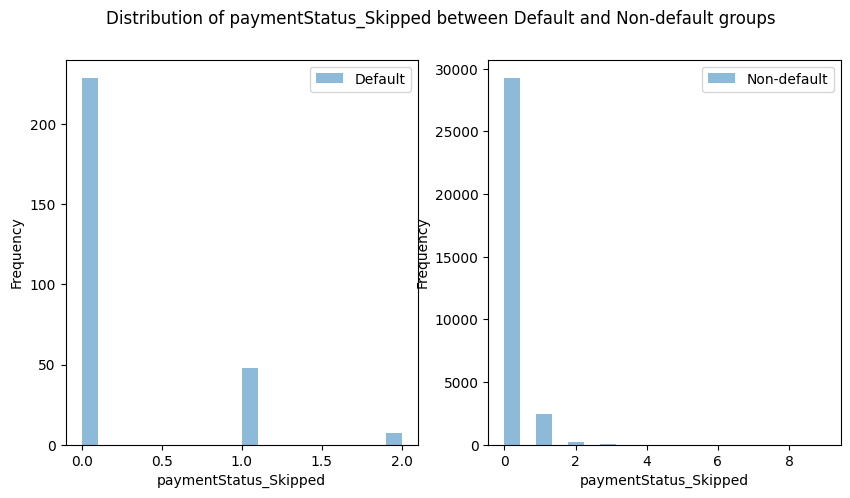

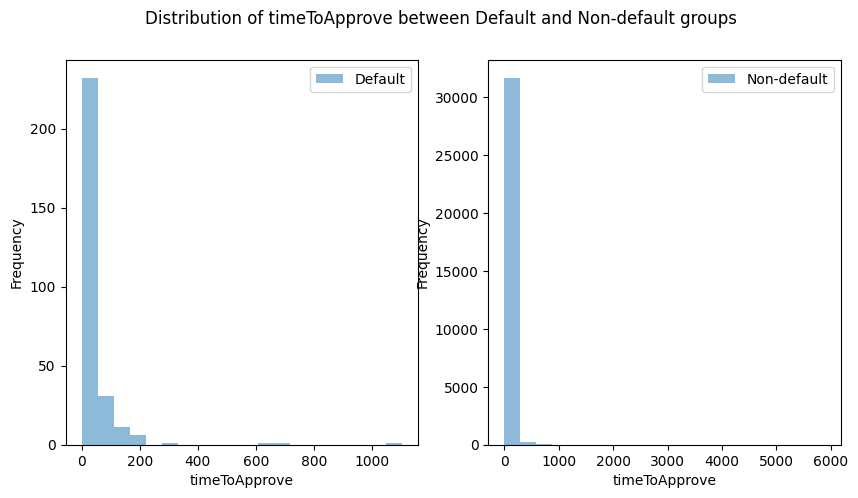

,loanId,payFrequency,apr,nPaidOff,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,...,clearfraudscore,paymentStatus_Cancelled,paymentStatus_Checked,paymentStatus_Complete,paymentStatus_None,paymentStatus_Pending,paymentStatus_Rejected,paymentStatus_Rejected Awaiting Retry,paymentStatus_Returned,paymentStatus_Skipped
0,LL-I-06644937,0,199.0,0.0,3000.0,6395.19,3,7,0,1,...,879.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LL-I-17826953,4,645.0,0.0,400.0,1364.87,24,4,40,1,...,658.0,0.0,0.0,0.0,24.0,2.0,0.0,0.0,0.0,0.0
2,LL-I-16519347,3,490.0,2.0,1250.0,3313.78,19,6,0,1,...,835.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LL-I-17491287,3,490.0,3.0,1250.0,3112.16,19,6,0,1,...,835.0,0.0,1.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0
4,LL-I-15679301,3,490.0,1.0,500.0,1292.09,19,6,0,1,...,835.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32175,LL-I-17508871,2,180.2,0.0,500.0,794.60,4,4,25,3,...,695.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
32176,LL-I-15280684,2,645.0,0.0,375.0,1042.40,1,4,25,1,...,700.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32177,LL-I-09897110,0,449.0,0.0,400.0,664.12,38,4,40,1,...,806.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32178,LL-I-14178923,0,625.0,0.0,600.0,1868.88,13,4,25,1,...,769.0,0.0,5.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [15]:
visual.plot_histograms(main_data, 'paymentStatus_Checked')
visual.plot_histograms(main_data, 'paymentStatus_Cancelled')
visual.plot_histograms(main_data, 'paymentStatus_Complete')
visual.plot_histograms(main_data, 'paymentStatus_None')
visual.plot_histograms(main_data, 'paymentStatus_Pending')
visual.plot_histograms(main_data, 'paymentStatus_Rejected')
visual.plot_histograms(main_data, 'paymentStatus_Rejected Awaiting Retry')
visual.plot_histograms(main_data, 'paymentStatus_Returned')
visual.plot_histograms(main_data, 'paymentStatus_Skipped')
visual.plot_histograms(main_data, 'timeToApprove')



unsurprisingly, most if not all the graphs are skewed to the left.

In [27]:
corr_matrix = main_data.corr()
print(corr_matrix)
corr_matrix.to_csv('data/corr_matrix.csv')

C:\Users\haffi\AppData\Local\Temp\ipykernel_16228\1536981585.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = main_data.corr()


                                       payFrequency       apr  nPaidOff  \
payFrequency                               1.000000  0.036308 -0.025378   
apr                                        0.036308  1.000000 -0.118152   
nPaidOff                                  -0.025378 -0.118152  1.000000   
loanAmount                                -0.002427 -0.396685  0.068800   
originallyScheduledPaymentAmount           0.015426 -0.173578  0.043466   
state                                     -0.025141  0.254926  0.023503   
leadType                                  -0.057694 -0.203306  0.374187   
leadCost                                  -0.096487 -0.070844 -0.155271   
fpStatus                                  -0.016848  0.067829 -0.073445   
hasCF                                           NaN       NaN       NaN   
default                                   -0.006670 -0.036024  0.009235   
timeToApprove                              0.003140 -0.026935  0.028854   
clearfraudscore          

By Matrices correlation, not much we can go on about to reduce the variables/features since most of them are seemingly not significant, so we would just go on ahead with the modelling

Seems that a majority of the graphs are skewed,  not symmetrical.

In [17]:
#dropping loanid to prepare for the data for the model
digit_only_main_data=main_data.drop(columns=['loanId'])
main_data.to_csv('data/digit_only_main_data.csv',index=False)
print(digit_only_main_data.columns)



Index(['payFrequency', 'apr', 'nPaidOff', 'loanAmount',
       'originallyScheduledPaymentAmount', 'state', 'leadType', 'leadCost',
       'fpStatus', 'hasCF', 'default', 'timeToApprove', 'clearfraudscore',
       'paymentStatus_Cancelled', 'paymentStatus_Checked',
       'paymentStatus_Complete', 'paymentStatus_None', 'paymentStatus_Pending',
       'paymentStatus_Rejected', 'paymentStatus_Rejected Awaiting Retry',
       'paymentStatus_Returned', 'paymentStatus_Skipped'],
      dtype='object')


In [18]:
x_train, x_test, y_train, y_test =model_train.splitting(digit_only_main_data,'default')


In [19]:
#train using decision tree
train_score, test_score = model_train.train_decision_tree(x_train, y_train, x_test, y_test)
print(f'Train accuracy: {train_score:.3f}')
print(f'Test accuracy: {test_score:.3f}')

#so DecisionTreeClassifier cannot accept NaN values, then we use hist gradient boosting

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [20]:
#using Gradient Boosting
train_score, test_score,importance,train_auc, test_auc = model_train.Hist_Gradient_Boosting(x_train, y_train, x_test, y_test)
print(f'Train accuracy: {train_score:.3f},Train_AUC:{train_auc:.3f}')
print(f'Test accuracy: {test_score:.3f},Test_AUC:{test_auc:.3f}')


Train accuracy: 0.993,Train_AUC:0.975
Test accuracy: 0.991,Test_AUC:0.787


while the train acc and AUC is high, the Test accuracy is not. further improvement would be parameter finetuning.

c:\Users\haffi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


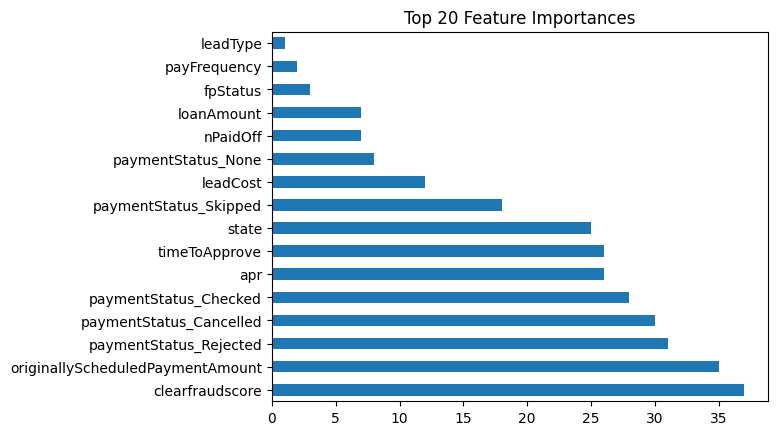

Train accuracy: 0.991,Train_AUC:0.898
Test accuracy: 0.991,Test_AUC:0.802


In [22]:
#try using xgb
train_score, test_score,train_auc, test_auc = model_train.XGBoost(x_train, y_train, x_test, y_test)
print(f'Train accuracy: {train_score:.3f},Train_AUC:{train_auc:.3f}')
print(f'Test accuracy: {test_score:.3f},Test_AUC:{test_auc:.3f}')

Looks like xgboost provides similar train and test accuracies but better train and test AUCs. While clear fraud score is a good indicator, it would also be appropriate to consider several other features/variables as above. 

While the paymentStatus have a good predicting power, there may be more insights that can be done to look into the borrower's payment history and financial situation.

Overall, these features do not necessarily cause someone to default on their loans. these features/variables are more to what has been correlated based on who has default and not. Further investigation on this features may be necessary and additional features may be added to capture more information. Other than that, parameter tuning may be done for the param values.